In [4]:
# import packages and read csv with data
import pandas as pd
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import warnings
import numpy as np
from sklearn.impute import KNNImputer

required_packages = [
    "pandas",
    "plotly",
    "matplotlib",
    "scikit-learn",
    "seaborn",
    "numpy"
]

with open("requirements.txt", "w") as f:
    for package in required_packages:
        f.write(f"{package}\n")

warnings.filterwarnings('ignore')

df = pd.read_csv('interview_task.csv')
pd.options.display.max_rows = None
pd.options.display.max_columns = None
df.head(3)

,id,range_sufficient_daily,range_long_trips_not_concern,range_meets_expectations,range_adequate_for_lifestyle,range_acceptable_compromise,range_confident_trip_planning,range_no_need_extender,range_winter_performance_acceptable,range_battery_life_confident,range_comparable_ice,charging_easy_home_install,charging_public_stations_convenient,charging_fast_charging_available,charging_time_fast_enough,charging_cost_affordable,charging_public_stations_reliable,charging_apartment_access_easy,charging_workplace_available,charging_standardized_helpful,charging_app_easy_to_use,cost_ev_price_acceptable,cost_long_term_savings_expected,cost_maintenance_low_important,cost_resale_value_confident,cost_overall_value_good,cost_comparable_ice,cost_fuel_savings_significant,cost_worth_the_investment,cost_financing_options_good,cost_insurance_affordable,incentives_aware_and_helpful,incentives_sufficient_to_buy,incentives_application_easy,incentives_clear_and_understandable,incentives_federal_important,incentives_state_important,incentives_local_important,incentives_access_easy,incentives_timely_payout,incentives_adequate_overall,performance_acceleration_impressive,performance_handling_good,performance_quiet_ride_enjoyable,performance_regen_braking_liked,performance_smooth_ride,performance_torque_satisfying,performance_overall_exciting,performance_reliable,performance_all_weather_good,performance_better_than_ice,features_tech_advanced_appealing,features_infotainment_easy_to_use,features_adas_useful,features_over_the_air_updates_valuable,features_interior_design_liked,features_exterior_styling_appealing,features_spacious_interior,features_cargo_space_adequate,features_customization_options_good,features_sustainable_materials_appreciated,practicality_easy_to_incorporate,practicality_charging_routine_easy,practicality_trip_planning_straightforward,practicality_home_charging_convenient,practicality_public_charging_accessible,practicality_maintenance_simple,practicality_reliable_daily_use,practicality_suitable_climate,practicality_fits_parking_needs,practicality_passenger_space_adequate,lifestyle_fits_eco_friendly_values,lifestyle_aligns_tech_savvy,lifestyle_improves_daily_commute,lifestyle_positive_social_image,lifestyle_family_friendly,lifestyle_pet_friendly,lifestyle_matches_personal_style,lifestyle_enhances_weekend_activities,lifestyle_easy_to_share,lifestyle_overall_positive_impact,psych_enviro_conscious,psych_tech_adopter,psych_value_innovation,psych_status_symbol,psych_future_oriented,psych_eco_responsibility,psych_enjoy_new_experiences,psych_value_performance,psych_comfort_safety,psych_influenced_by_trends,psych_care_about_aesthetics,psych_brand_loyal,psych_price_sensitive,psych_practicality_important,psych_socially_responsible,psych_confident_new_tech,psych_enjoy_driving,psych_seek_convenience,age,salary
0,8usLFgooY6,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,5.0,2.0,3.0,3.0,1.0,3.0,2.0,5.0,3.0,NaN,3.0,4.0,3.0,5.0,5.0,4.0,18.0,30000.0
1,efwNEZ1Tpu,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,2.0,5.0,1.0,4.0,3.0,5.0,5.0,3.0,5.0,3.0,2.0,NaN,3.0,1.0,2.0,3.0,62.0,107216.0
2,D2Aqz9aBrP,0.0,0.0,1.0,0.0,NaN,0.0,0.0,0.0,NaN,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,NaN,0.0,0.0,1.0,0.0,0.

In [5]:
# number of rows and cols
df.shape

(10000, 101)

In [6]:
# look at columns in data
df.columns.tolist()

['id',
 'range_sufficient_daily',
 'range_long_trips_not_concern',
 'range_meets_expectations',
 'range_adequate_for_lifestyle',
 'range_acceptable_compromise',
 'range_confident_trip_planning',
 'range_no_need_extender',
 'range_winter_performance_acceptable',
 'range_battery_life_confident',
 'range_comparable_ice',
 'charging_easy_home_install',
 'charging_public_stations_convenient',
 'charging_fast_charging_available',
 'charging_time_fast_enough',
 'charging_cost_affordable',
 'charging_public_stations_reliable',
 'charging_apartment_access_easy',
 'charging_workplace_available',
 'charging_standardized_helpful',
 'charging_app_easy_to_use',
 'cost_ev_price_acceptable',
 'cost_long_term_savings_expected',
 'cost_maintenance_low_important',
 'cost_resale_value_confident',
 'cost_overall_value_good',
 'cost_comparable_ice',
 'cost_fuel_savings_significant',
 'cost_worth_the_investment',
 'cost_financing_options_good',
 'cost_insurance_affordable',
 'incentives_aware_and_helpful',
 

In [7]:
# count of dtypes in data
df.dtypes.value_counts()

float64    100
object       1
Name: count, dtype: int64

## check nulls

In [8]:
df.isnull().sum().sum()

np.int64(50000)

### check nulls on a heatmap

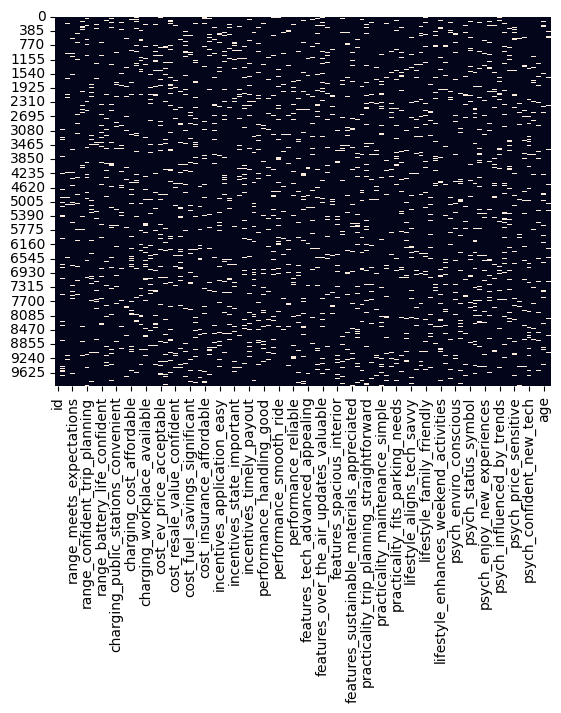

In [9]:
sns.heatmap(df.isnull(), cbar=False)
plt.show()

### percent of nulls in each column

In [10]:
percent_nulls = df.isnull().mean() * 100
print(percent_nulls)

id                                            0.0
range_sufficient_daily                        5.0
range_long_trips_not_concern                  5.0
range_meets_expectations                      5.0
range_adequate_for_lifestyle                  5.0
range_acceptable_compromise                   5.0
range_confident_trip_planning                 5.0
range_no_need_extender                        5.0
range_winter_performance_acceptable           5.0
range_battery_life_confident                  5.0
range_comparable_ice                          5.0
charging_easy_home_install                    5.0
charging_public_stations_convenient           5.0
charging_fast_charging_available              5.0
charging_time_fast_enough                     5.0
charging_cost_affordable                      5.0
charging_public_stations_reliable             5.0
charging_apartment_access_easy                5.0
charging_workplace_available                  5.0
charging_standardized_helpful                 5.0


### Separate feature categories

In [11]:
range_cols = [col for col in df.columns if col.startswith('range_')]
charging_cols = [col for col in df.columns if col.startswith('charging_')]
cost_cols = [col for col in df.columns if col.startswith('cost_')]
incentives_cols = [col for col in df.columns if col.startswith('incentives_')]
performance_cols = [col for col in df.columns if col.startswith('performance_')]
features_cols = [col for col in df.columns if col.startswith('features_')]
practicality_cols = [col for col in df.columns if col.startswith('practicality_')]
lifestyle_cols = [col for col in df.columns if col.startswith('lifestyle_')]
psych_cols = [col for col in df.columns if col.startswith('psych_')]
demo_cols = ['age', 'salary']

### binary columns

In [12]:
binary_cols = (range_cols + charging_cols + cost_cols + incentives_cols + performance_cols + features_cols + practicality_cols + lifestyle_cols)

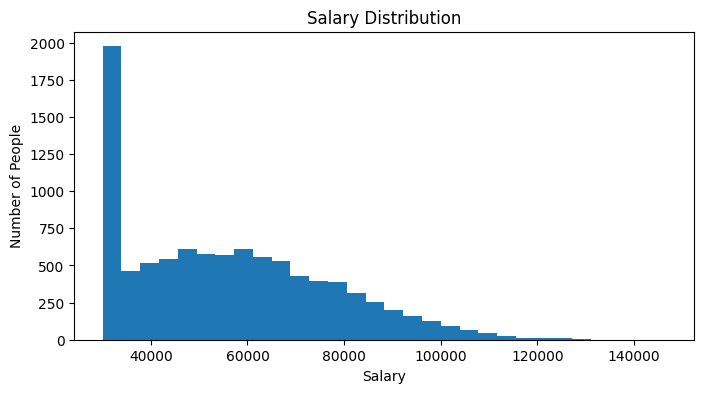

In [13]:
plt.figure(figsize=(8, 4))
plt.hist(df['salary'], bins=30)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Number of People')
plt.show()

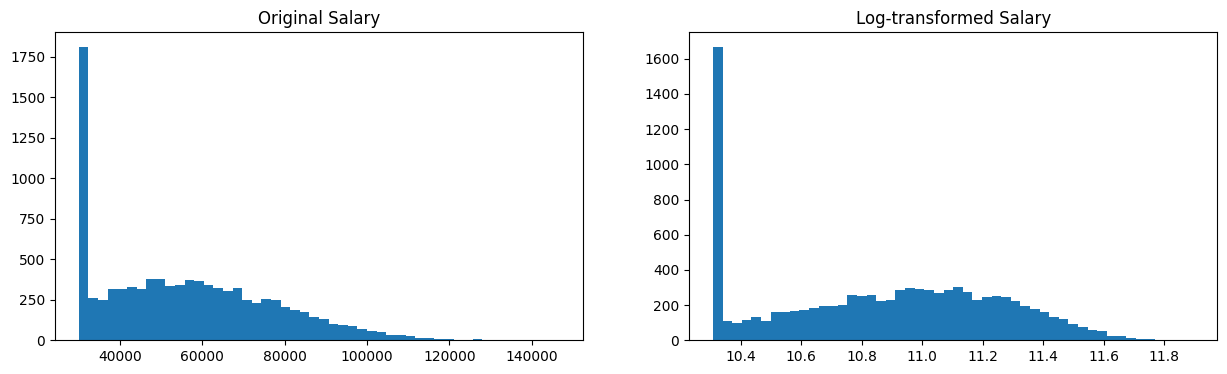

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
ax1.hist(df['salary'], bins=50)
ax1.set_title('Original Salary')
ax2.hist(np.log1p(df['salary']), bins=50)
ax2.set_title('Log-transformed Salary')
plt.show()

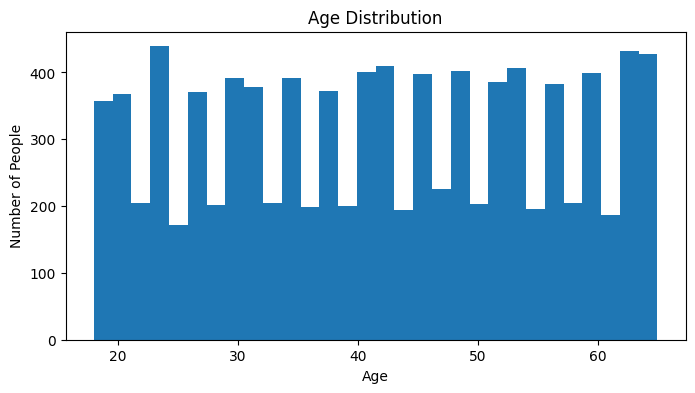

In [15]:
plt.figure(figsize=(8, 4))
plt.hist(df['age'], bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.show()

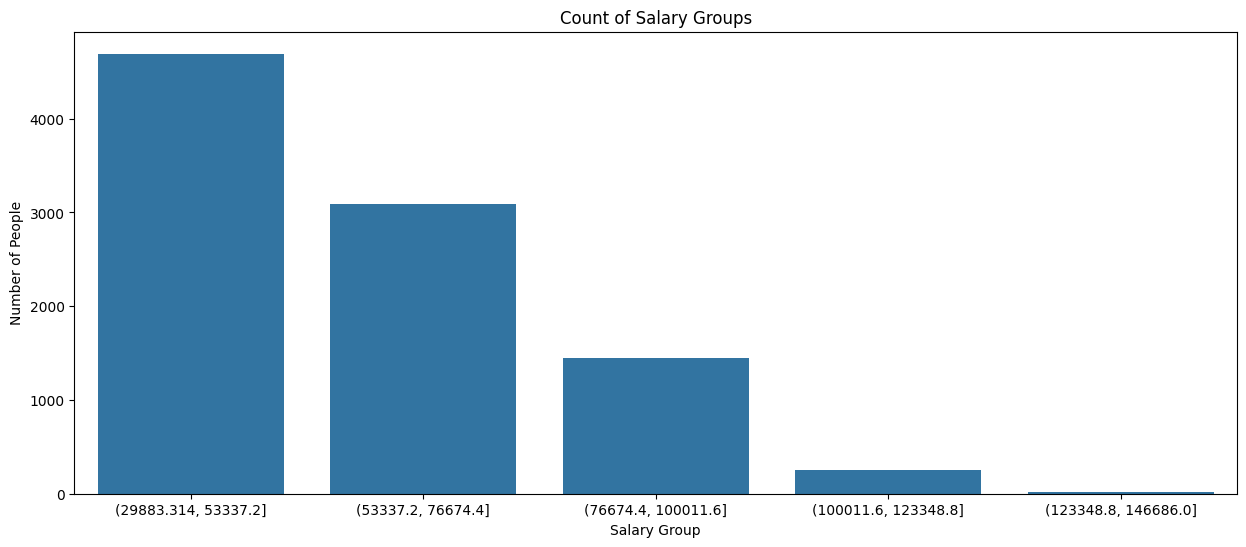

In [16]:
plt.figure(figsize=(15, 6))
df['salary_bin'] = pd.cut(df['salary'], bins=5)
sns.countplot(x='salary_bin', data=df)
plt.title('Count of Salary Groups')
plt.xlabel('Salary Group')
plt.ylabel('Number of People')
plt.show()

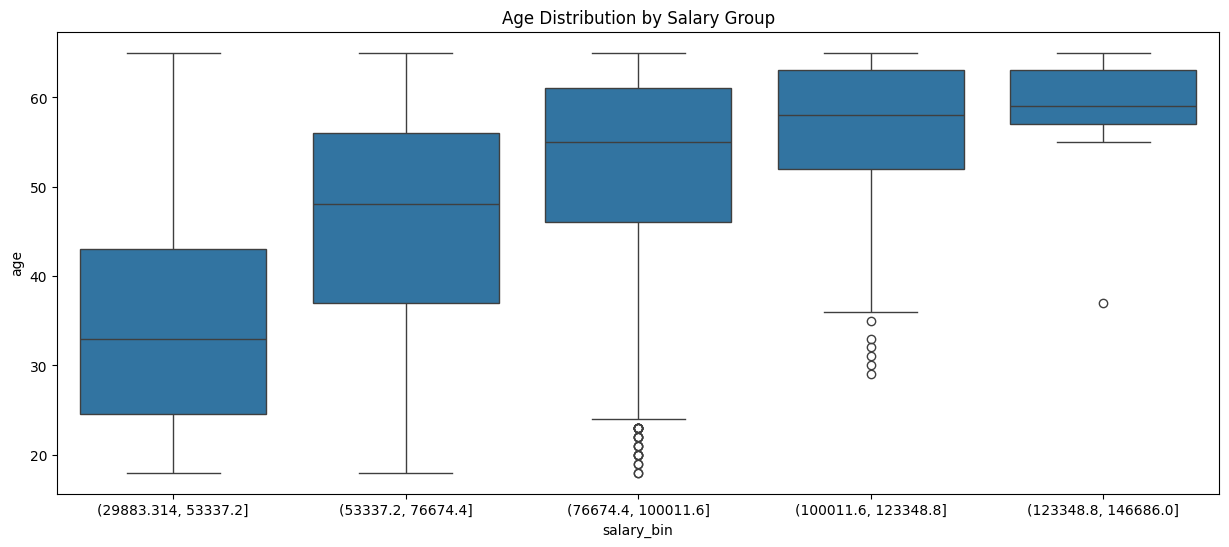

In [17]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='salary_bin', y='age', data=df)
df.drop('salary_bin', axis=1, inplace = True)
plt.title('Age Distribution by Salary Group')
plt.show()

### handling nulls with KNNImputer

In [18]:
df_imputed = df.drop('id', axis=1).copy()
ordinal_col = psych_cols
numeric_cols = demo_cols

# log because salary is right-skewed
df_imputed['salary'] = np.log1p(df_imputed['salary'])

scaler = StandardScaler()
scaled = scaler.fit_transform(df_imputed)

imputer = KNNImputer(n_neighbors=5)
imputed_scaled = imputer.fit_transform(scaled)

df_imputed = pd.DataFrame(
    scaler.inverse_transform(imputed_scaled),
    columns=df.drop('id', axis=1).columns
)

df_imputed['salary'] = np.expm1(df_imputed['salary'])

# change type to int
df_imputed[binary_cols + ordinal_col] = df_imputed[binary_cols + ordinal_col].round().astype(int)

In [19]:
df = df_imputed.copy()

### check nulls again

In [20]:
df.isnull().sum().sum()

np.int64(0)

### check dtypes again

In [21]:
df.dtypes.value_counts()

int64      98
float64     2
Name: count, dtype: int64

### create feature groups with columns

In [22]:
feature_groups = {
        'range': range_cols,
        'charging': charging_cols,
        'cost': cost_cols,
        'incentives': incentives_cols,
        'performance': performance_cols,
        'features': features_cols,
        'practicality': practicality_cols,
        'lifestyle': lifestyle_cols,
        'psychographics': psych_cols,
        'demographics': demo_cols
    }

### check outliers in data

In [23]:
Q1 = df[numeric_cols].quantile(0.15)
Q3 = df[numeric_cols].quantile(0.85)
IQR = Q3 - Q1

outliers_iqr = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR)))
len(df[outliers_iqr.any(axis=1)])

0

### create composite features (scores) for each feature category

In [24]:
def create_composite_features(df, feature_groups):
    df_features = df.copy()
    for category, cols in feature_groups.items():
      if category != 'demographics':
        df_features[f'{category}_score'] = df[cols].mean(axis=1)

    # log salary because of right-skewed
    df_features['salary_log'] = np.log1p(df['salary'])

    composite_features = [f'{cat}_score' for cat in feature_groups.keys() if cat != 'demographics']
    composite_features.extend(['salary_log'])
    composite_features.extend(['age'])
    print(f"\nFinal features for clustering: {composite_features}")
    return df_features, composite_features

### Determine optimal number of clusters with elbow method and silhouette analysis

In [25]:
def find_optimal_clusters(X):
    inertias = []
    silhouette_scores = []
    K = range(3, 11)

    # scaling data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X_scaled)
        inertias.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))

    # Elbow plot
    ax1.plot(K, inertias, 'bo-')
    ax1.set_xlabel('Number of Clusters (k)')
    ax1.set_ylabel('Inertia')
    ax1.set_title('Elbow Method for Optimal k')
    ax1.grid(True)

    # Silhouette plot
    ax2.plot(K, silhouette_scores, 'ro-')
    ax2.set_xlabel('Number of Clusters (k)')
    ax2.set_ylabel('Silhouette Score')
    ax2.set_title('Silhouette Analysis')
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

    # optimal number of clusters
    optimal_k = K[np.argmax(silhouette_scores)]
    return optimal_k, silhouette_scores


Final features for clustering: ['range_score', 'charging_score', 'cost_score', 'incentives_score', 'performance_score', 'features_score', 'practicality_score', 'lifestyle_score', 'psychographics_score', 'salary_log', 'age']


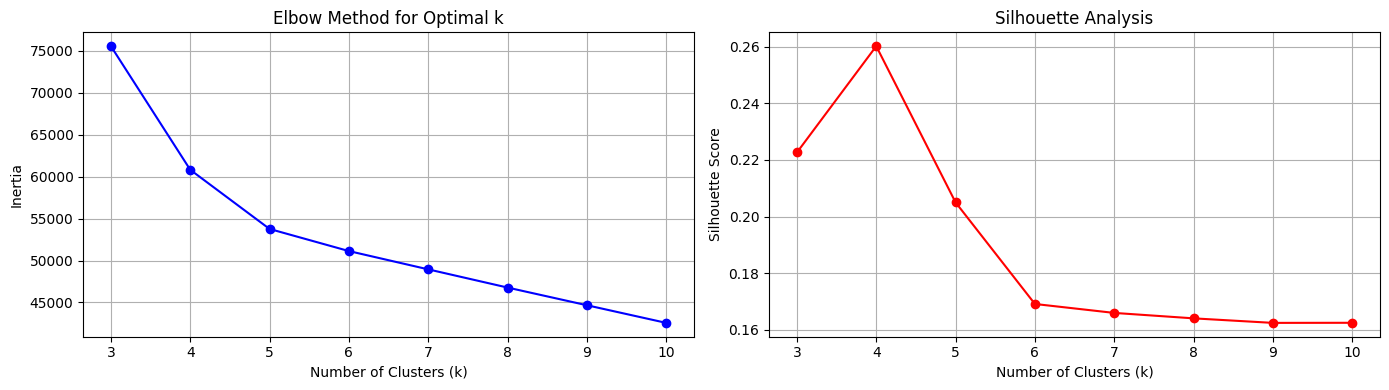

In [26]:
df_features, composite_feature_names = create_composite_features(df, feature_groups)
X = df_features[composite_feature_names].values

optimal_k, silhouette_scores = find_optimal_clusters(X)

### Clustering and results (and PCA for visualization)

In [36]:
list(feature_groups.keys())


['range',
 'charging',
 'cost',
 'incentives',
 'performance',
 'features',
 'practicality',
 'lifestyle',
 'psychographics',
 'demographics']

In [37]:
def perform_clustering(X, n_clusters, feature_names):

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    
    kmeans_df = pd.DataFrame({'labels': cluster_labels, 'varieties': list(feature_groups.keys())})
    ct = pd.crosstab(kmeans_df['labels'],kmeans_df['varieties'])
    # Display ct
    print(kmeans_df)

    
    pca = PCA(n_components=3)
    X_pca = pca.fit_transform(X_scaled)

    results_df = pd.DataFrame(X_scaled, columns=feature_names)
    results_df['cluster'] = cluster_labels
    results_df['pca1'] = X_pca[:, 0]
    results_df['pca2'] = X_pca[:, 1]
    results_df['pca3'] = X_pca[:, 2]

    return results_df, kmeans, pca

In [38]:
results_df, kmeans, pca = perform_clustering(X, optimal_k, composite_feature_names)

ValueError: All arrays must be of the same length

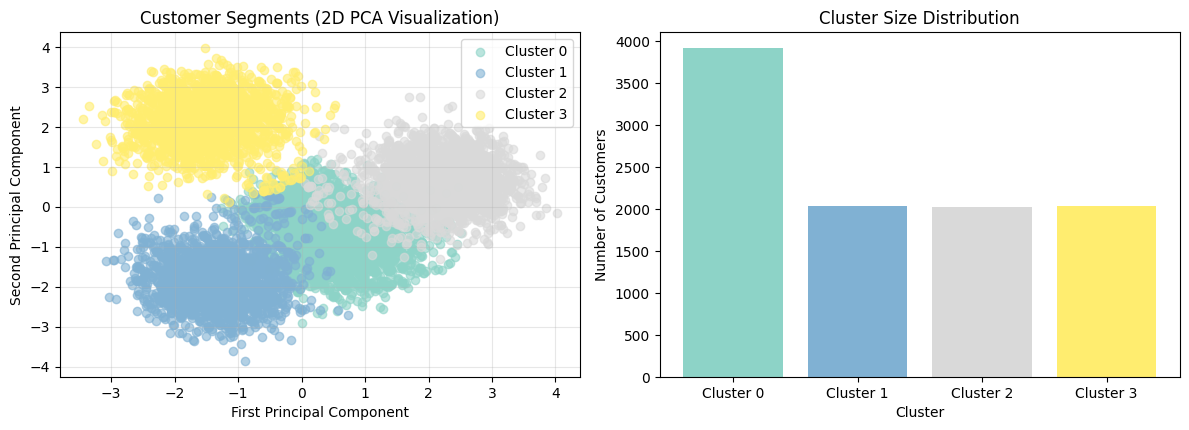

In [27]:
n_clusters = len(results_df['cluster'].unique())
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
colors = plt.cm.Set3(np.linspace(0, 1, n_clusters))
for i, color in enumerate(colors):
    cluster_data = results_df[results_df['cluster'] == i]
    plt.scatter(cluster_data['pca1'], cluster_data['pca2'],
                c=[color], label=f'Cluster {i}', alpha=0.6)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Customer Segments (2D PCA Visualization)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 2)
cluster_counts = results_df['cluster'].value_counts().sort_index()
plt.bar(range(n_clusters), cluster_counts.values, color=colors)
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.title('Cluster Size Distribution')
plt.xticks(range(n_clusters), [f'Cluster {i}' for i in range(n_clusters)])

plt.tight_layout()
plt.show()

### 3D PCA Visualization

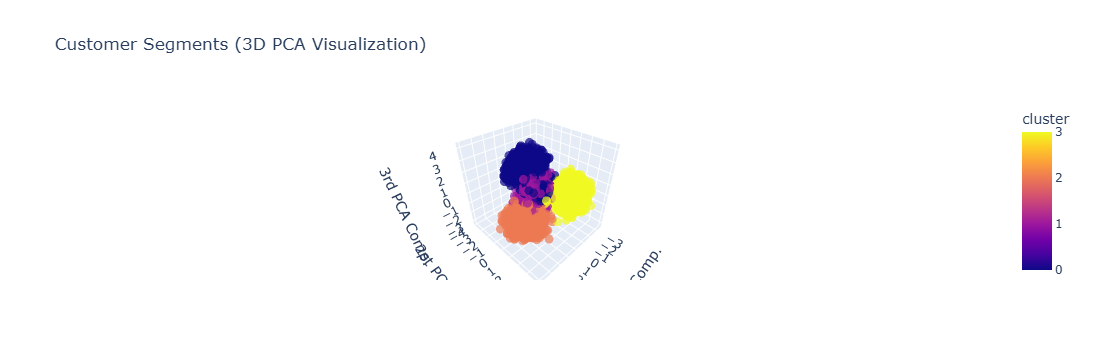

<Figure size 1200x1500 with 0 Axes>

In [28]:
plt.figure(figsize=(12, 15))
fig = px.scatter_3d(
    results_df,
    x='pca1',
    y='pca2',
    z='pca3',
    color='cluster',
    title='Customer Segments (3D PCA Visualization)',
    labels={'pca1': '1st PCA Comp.',
            'pca2': '2st PCA Comp.',
            'pca3': '3rd PCA Comp.'},
    opacity=0.7
)

fig.update_traces(marker=dict(size=5))
fig.update_layout(legend_title_text='Cluster')
fig.show()

### analyze clusters (total customers)

In [29]:
def analyze_clusters(results_df, feature_names):
    cluster_summary = results_df.groupby('cluster')[feature_names].mean()
    cluster_counts = results_df['cluster'].value_counts().sort_index()

    print(f"Cluster sizes: {dict(cluster_counts)}")
    print(f"Total customers: {len(results_df)}")
    return cluster_summary, cluster_counts

In [30]:
cluster_summary, cluster_counts = analyze_clusters(results_df, composite_feature_names)

Cluster sizes: {0: np.int64(3911), 1: np.int64(2036), 2: np.int64(2024), 3: np.int64(2029)}
Total customers: 10000


### df groupby cluser with mean of feature group

Text(50.58159722222221, 0.5, 'Features')

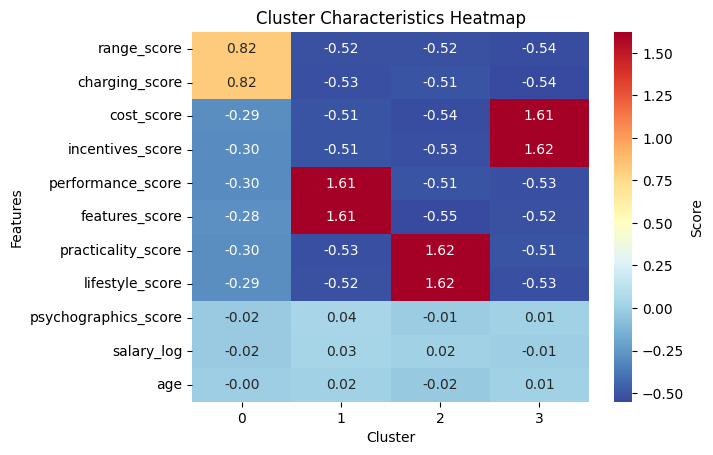

In [31]:
sns.heatmap(cluster_summary.T, annot=True, cmap='RdYlBu_r', center=0.5,
            fmt='.2f', cbar_kws={'label': 'Score'})
plt.title('Cluster Characteristics Heatmap')
plt.xlabel('Cluster')
plt.ylabel('Features')

### OPTIMAL NUMBER OF SEGMENTS

In [32]:
print(f"optimal_k: {optimal_k}: distinct customer segments")

optimal_k: 4: distinct customer segments


### create cluster recommendations of what is the most important category group (based on mean score)

In [33]:
def create_cluster_personas(results_df, cluster_summary, original_df, feature_groups):
    n_clusters = len(cluster_summary)

    for cluster_id in range(n_clusters):
        cluster_data = results_df[results_df['cluster'] == cluster_id]
        cluster_size = len(cluster_data)

        print(f"\nCLUSTER {cluster_id} - {cluster_size} customers")
        print("-" * 50)

        cluster_indices = cluster_data.index
        cluster_original = original_df.iloc[cluster_indices]

        categories_analysis = {}
        for category, cols in feature_groups.items():
            if category == 'demographics' or category == 'psychographics':
                continue

            category_scores = cluster_original[cols].mean()
            high_scoring = category_scores[category_scores > 0.6].index.tolist()
            categories_analysis[category] = {
                'score': category_scores.mean(),
                'high_features': high_scoring
            }

        print(f"Key Characteristics:")
        for category, analysis in categories_analysis.items():
            score = analysis['score']
            if score > 0.6:
                print(f"   • Strong {category.title()} orientation (Score: {score:.2f})")

        print(f"Marketing Message Recommendations:")
        high_categories = [cat for cat, analysis in categories_analysis.items() if analysis['score'] > 0.6]
        if high_categories:
            print(f"   • Focus on: {', '.join(high_categories)}")

In [34]:
create_cluster_personas(results_df, cluster_summary, df, feature_groups)


CLUSTER 0 - 3911 customers
--------------------------------------------------
Key Characteristics:
   • Strong Range orientation (Score: 0.61)
   • Strong Charging orientation (Score: 0.61)
Marketing Message Recommendations:
   • Focus on: range, charging

CLUSTER 1 - 2036 customers
--------------------------------------------------
Key Characteristics:
   • Strong Performance orientation (Score: 0.80)
   • Strong Features orientation (Score: 0.80)
Marketing Message Recommendations:
   • Focus on: performance, features

CLUSTER 2 - 2024 customers
--------------------------------------------------
Key Characteristics:
   • Strong Practicality orientation (Score: 0.80)
   • Strong Lifestyle orientation (Score: 0.81)
Marketing Message Recommendations:
   • Focus on: practicality, lifestyle

CLUSTER 3 - 2029 customers
--------------------------------------------------
Key Characteristics:
   • Strong Cost orientation (Score: 0.80)
   • Strong Incentives orientation (Score: 0.80)
Marketing

### create cluster recommendations of what is the most important category group (based on z_score)

In [35]:
def create_cluster_personas_with_diff_zscore(results_df, original_df, feature_groups):
    n_clusters = results_df['cluster'].nunique()
    all_cluster_indices = set(results_df.index)

    for cluster_id in range(n_clusters):
        cluster_indices = results_df[results_df['cluster'] == cluster_id].index
        out_cluster_indices = list(all_cluster_indices - set(cluster_indices))

        print(f"\nCLUSTER {cluster_id} - {len(cluster_indices)} customers")
        print("-" * 50)

        categories_analysis = {}
        for category, cols in feature_groups.items():
            mean_in = original_df.loc[cluster_indices, cols].mean().mean()
            mean_out = original_df.loc[out_cluster_indices, cols].mean().mean()

            diff = mean_in - mean_out

            std_in = original_df.loc[cluster_indices, cols].mean(axis=1).std()
            std_out = original_df.loc[out_cluster_indices, cols].mean(axis=1).std()
            pooled_std = np.sqrt((std_in ** 2 + std_out ** 2) / 2)

            z_score = diff / pooled_std if pooled_std > 0 else 0
            categories_analysis[category] = {'z_score': z_score}

        print(f"Key Characteristics (groups with |z_score| > 1):")
        for category, stats in categories_analysis.items():
            if abs(stats['z_score']) > 1:
                print(f"z_score={stats['z_score']:.2f}")

        high_categories = [cat for cat, stats in categories_analysis.items() if stats['z_score'] > 1]
        if high_categories:
            print(f"\nMarketing Message Recommendations:")
            print(f"   • Focus on: {', '.join(high_categories)}")

In [36]:
create_cluster_personas_with_diff_zscore(results_df, df, feature_groups)


CLUSTER 0 - 3911 customers
--------------------------------------------------
Key Characteristics (groups with |z_score| > 1):
z_score=1.71
z_score=1.70

Marketing Message Recommendations:
   • Focus on: range, charging

CLUSTER 1 - 2036 customers
--------------------------------------------------
Key Characteristics (groups with |z_score| > 1):
z_score=3.56
z_score=3.56

Marketing Message Recommendations:
   • Focus on: performance, features

CLUSTER 2 - 2024 customers
--------------------------------------------------
Key Characteristics (groups with |z_score| > 1):
z_score=3.58
z_score=3.60

Marketing Message Recommendations:
   • Focus on: practicality, lifestyle

CLUSTER 3 - 2029 customers
--------------------------------------------------
Key Characteristics (groups with |z_score| > 1):
z_score=3.54
z_score=3.60

Marketing Message Recommendations:
   • Focus on: cost, incentives


# CLUSTER BUSINESS INTERPRETATION
---



**CLUSTER 0**: Premium/Range Segment

KEY FEATURES: range_score, charging_score

CUSTOMER PROFILE: Customers valuing long range and charging convenience


---



**CLUSTER 1**: Performance/Premium Segment

KEY FEATURES: performance_score, features_score

CUSTOMER PROFILE: Automotive enthusiasts, premium customers



---


**CLUSTER 2**: Practical/Family Segment

KEY FEATURES: practicality_score, lifestyle_score

CUSTOMER PROFILE: Families, daily users


---



**CLUSTER 3**: Economic Segment

KEY FEATURES: cost_score, incentives_score

CUSTOMER PROFILE: Price-sensitive customers, first-time EV buyers